In [65]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import math

In [1]:
with open('results_merge.txt') as f:
    data = f.readlines()

In [6]:
data[0:7]

['>>>TESTING: 512 , file:512_a=0.25_unif_1495606300399\n',
 'Runs generated 2\n',
 'Seconds: 0\n',
 'Number merges 1\n',
 'Segments sorted in Run_3_1.49560630055E12\n',
 'Number access 1st: 1024\n',
 'Number access 2nd: 1027\n']

In [9]:
data[0].split(" ")

['>>>TESTING:', '512', ',', 'file:512_a=0.25_unif_1495606300399\n']

In [88]:
n_values = []
times = []
access = []
for line in data:
    tokens = line.split(" ")
    if tokens[0] == '>>>TESTING:':
        n_values.append(int(tokens[1]))
    elif tokens[0] == 'Seconds:':
        times.append(int(tokens[1]))
    if len(tokens) <= 2:
        continue
    elif tokens[2] == '1st:':
        access.append(int(tokens[3][0:-1])) # without \n
    elif tokens[2] == '2nd:':
        access[-1] = int(tokens[3][0:-1])

In [89]:
print len(n_values), len(times), len(access)

234 234 234


In [116]:
x = np.arange(1, 2**21, 10)
n = x*29.0/2**5
m = 2.0**13/2**5
y = []
for i in range(0, x.shape[0]):
    y.append(n[i]*math.log(n[i], m))
y = np.array(y)

In [91]:
# seconds to miliseconds
times_ms = np.array(times)
times_ms = times_ms*1e4

In [93]:
fig_size = plt.rcParams["figure.figsize"]
"Current size:", fig_size

('Current size:', [6.0, 4.0])

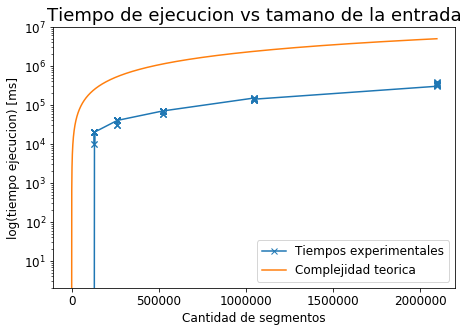

In [113]:
%matplotlib inline
plt.figure(figsize=(6*1.2,4*1.2))
plt.rcParams.update({'font.size': 12})
plt.plot(n_values, times_ms, marker='x', label = 'Tiempos experimentales')
plt.plot(x, y, label='Complejidad teorica')
plt.yscale('log')
plt.legend()
plt.title('Tiempo de ejecucion vs tamano de la entrada', fontsize=18)
plt.xlabel('Cantidad de segmentos')
plt.ylabel('log(tiempo ejecucion) [ms]')
plt.show()

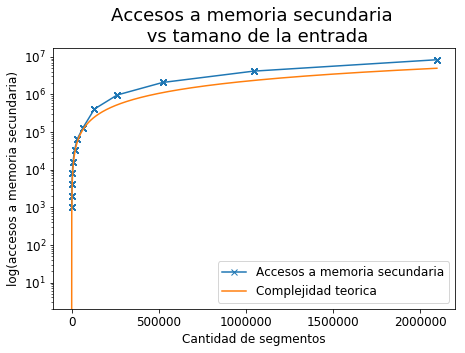

In [112]:
plt.figure(figsize=(6*1.2,4*1.2))
plt.rcParams.update({'font.size': 12})
plt.plot(n_values, access, marker='x', label='Accesos a memoria secundaria')
plt.plot(x, y, label='Complejidad teorica')
plt.yscale('log')
plt.legend()
plt.title('Accesos a memoria secundaria \n vs tamano de la entrada', fontsize=18)
plt.xlabel('Cantidad de segmentos')
plt.ylabel('log(accesos a memoria secundaria)')
plt.show()